In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [4]:
import os
import numpy as np
import math
import random
random.uniform(0, 1)



0.4759439062390869

In [5]:
cwd = os.getcwd()

In [41]:
cwd = os.getcwd()
f2 = open(cwd+'/qs_1700001avg.dat' , 'r')
total = 6400
natom = 6300
test = total-natom
x_botrain = np.zeros((natom,8))
x_botest = np.zeros((test,8))
x_pos = np.zeros(natom)
atom = 0
while True:
    s = f2.readline().split()
    if not s: break
    if atom < natom:    
        for i in range(8):
            x_botrain[atom,i] = float(s[i+2])
        x_pos[atom] = float(s[1])
    else:
        for i in range(8):
            x_botest[atom-natom,i] = float(s[i+2])
    atom = atom + 1
x_botrain[0],x_botrain.shape
x_botrain = x_botrain.astype('float32')
x_botest = x_botest.astype('float32')
print(x_botrain.shape)
print(x_botest.shape)

(6300, 8)
(100, 8)


In [42]:
avg = sum(x_botrain[i,:])/8.

In [43]:
sum1 = 0.
for i in range(natom):
    avg = sum(x_botrain[i,:])/8.
    for j in range(8):
        sum1 += (x_botrain[0,j] - avg)**2
msd = sum1/natom
msd

0.02598307260842571

In [44]:
input_img = Input(shape=(8,))
initializer1 = tf.keras.initializers.RandomNormal(mean=0., stddev=1./math.sqrt(8),seed=100)
encoded1 = Dense(80, activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(0.00001),kernel_initializer=initializer1,bias_initializer='zeros')(input_img)

initializer2 = tf.keras.initializers.RandomNormal(mean=0., stddev=1./math.sqrt(80),seed=101)
encoded2 = Dense(2, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.00001),kernel_initializer=initializer2,bias_initializer='zeros')(encoded1)

initializer3 = tf.keras.initializers.RandomNormal(mean=0., stddev=1./math.sqrt(2),seed=102)
decoded1 = Dense(80, activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(0.00001),kernel_initializer=initializer3,bias_initializer='zeros')(encoded2)

initializer4 = tf.keras.initializers.RandomNormal(mean=0., stddev=1./math.sqrt(80),seed=103)
decoded2 = Dense(8, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.00001),kernel_initializer=initializer4,bias_initializer='zeros')(decoded1)

In [45]:
autoencoder = Model(input_img, decoded2)
autoencoder.compile(optimizer='SGD', loss='mse')

history=autoencoder.fit(x_botrain, x_botrain,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_botest, x_botest))
history

Epoch 1/500
25/25 [==============================] - 0s 9ms/step - loss: 0.0140 - val_loss: 0.0149
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0116
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0096
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0083
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0073
Epoch 6/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0061
Epoch 8/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 9/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 10/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 11/

Epoch 83/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 84/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 85/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 86/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 87/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 88/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 89/500
25/25 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 90/500
25/25 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 91/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 92/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0031


25/25 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 165/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 166/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 167/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 168/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 169/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 170/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 171/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 172/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 173/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0027
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 246/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 247/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 248/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 249/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 250/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 251/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 252/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 253/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 254/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0026
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 327/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 328/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 329/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 330/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 331/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 332/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 333/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 334/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 335/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0025
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 408/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 409/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 410/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 411/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 412/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 413/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 414/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 415/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 416/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 489/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 490/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 491/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 492/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 493/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 494/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 495/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 496/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 497/500
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0024
Epoc

Train: 0.002, Test: 0.002


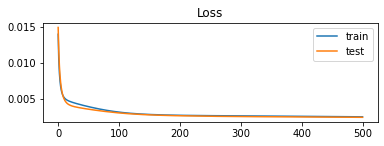

In [46]:
from matplotlib import pyplot
train_mse = autoencoder.evaluate(x_botrain, x_botrain, verbose=0)
test_mse = autoencoder.evaluate(x_botest, x_botest, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

In [47]:
encode = Model(inputs=input_img, outputs=encoded2)
latent_vector = encode.predict(x_botrain)
autoencoder

In [48]:
encoded_input = Input(shape=(2,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))
#decoder = Model(inputs=encoded_input, outputs=encoded_input))
decoder_layer1

In [49]:
# get latent vector for visualization
latent_vector = encode.predict(x_botrain)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)
#reconstructed_imgs[0],x_botest[0],latent_vector[0]
loss = tf.keras.losses.mean_squared_error(x_botrain, reconstructed_imgs)

In [50]:
sum(loss)/len(loss)/msd

<tf.Tensor: shape=(), dtype=float32, numpy=0.022680003>

In [16]:
sum(loss)/len(loss)

<tf.Tensor: shape=(), dtype=float32, numpy=0.00062189385>

Text(0, 0.5, 'MSE')

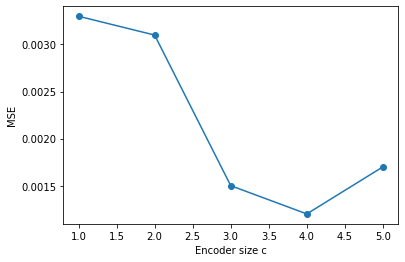

In [50]:
c= [0.0033,0.0031,0.0015,0.0012,0.0017]
a=[1,2,3,4,5] 
b= [0.038,0.016,0.0104,0.0098,0.0075]
import matplotlib.pyplot as plt
plt.plot(a,c)
plt.scatter(a,c)
plt.xlabel('Encoder size c')
plt.ylabel('MSE')
#plt.savefig('MSE_vs_c_10.png' ,dpi = 100)

In [52]:
fsave = open('y1_y2-17-1avg.dat','w')
y1 = []
y2 = []
for i in range(natom):
    y1.append(float(latent_vector[i,0]))
    y2.append(float(latent_vector[i,1]))
    fsave.write("%d \t %f \t %f \t %f" % (i+1,x_pos[i],y1[i],y2[i]))
    fsave.write('\n')
len(y1),len(x_pos)

(6300, 6300)

In [71]:
# calculate bayesian information criterion for a linear regression model
from math import log
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# calculate bic for regression
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic
 

bic = calculate_bic(len(y1), mse, 1)
print('BIC: %.3f' % bic)


NameError: name 'mse' is not defined

In [40]:
from sklearn import mixture
import matplotlib.pyplot as plt
lowest_bic = np.infty
bic = []
n_components_range = range(1, 13)
for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components)
        gmm.fit(latent_vector)
        bic.append(gmm.bic(latent_vector))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
bic = np.array(bic)
bic

array([-49222.4450918 , -65966.54242174, -73958.84055078, -74357.30395956,
       -74368.44194197, -74381.72300018, -74514.55317892, -74529.29909805,
       -74456.87571103, -74438.07303773, -74397.4061558 , -74338.54851821])

Text(0, 0.5, 'BIC')

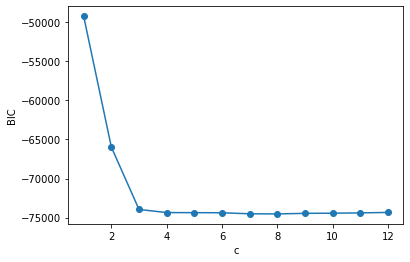

In [41]:
component = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(component,bic)
plt.scatter(component,bic)
plt.xlabel('c')
plt.ylabel('BIC')
#plt.savefig('BIC_neq-135.png' ,dpi = 100)

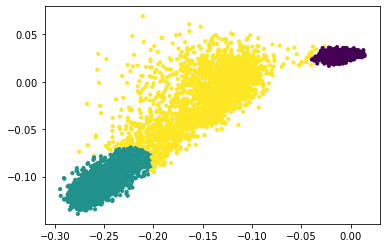

In [67]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
gausno = 3
gmm = GaussianMixture(n_components=gausno).fit(latent_vector)
labels = gmm.predict(latent_vector)

plt.scatter(y1, y2, c=labels, s=10, cmap='viridis')
prediction_gmm = gmm.predict(latent_vector)
probs = gmm.predict_proba(latent_vector)
#plt.savefig('gmm_neq-440-avg.png')

In [43]:
probs[0]

array([6.09100110e-03, 0.00000000e+00, 3.58152854e-04, 9.93550846e-01])

737

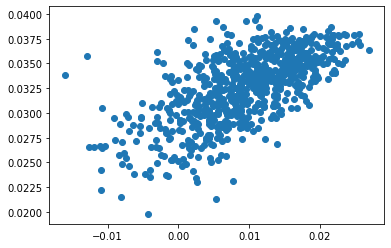

In [44]:
hot1 = []
hot2 = []
L = 16.75
for i in range(len(y1)):
    if abs(x_pos[i]) < L/4.:
        hot1.append(y1[i])
        hot2.append(y2[i])
plt.scatter(hot1,hot2) 
len(hot1)

In [45]:
probK4 = probs
probK4[0]
import math
SK4 = 0.
for i in range(natom):
    for j in range(gausno):
        if probs[i,j]!=0.:
            SK4 += probs[i,j]*math.log(probs[i,j])  
SK4 = -SK4
SK4    

959.0862184288186

In [21]:
import math
a = math.comb(gausno,2)
sum3 = np.zeros(a)
IDJ = []
IDK = []
probK4

array([[9.39012468e-01, 1.34191492e-13, 4.38248398e-03, 6.49594458e-39,
        5.65925919e-02, 1.24565301e-05],
       [4.33812968e-03, 1.45099065e-08, 2.19809837e-01, 6.53423696e-25,
        5.52705586e-01, 2.23146433e-01],
       [1.50762533e-03, 5.62907994e-07, 9.05384250e-01, 2.78954258e-21,
        9.51655631e-04, 9.21559060e-02],
       ...,
       [9.42220727e-01, 1.85900393e-14, 1.16323546e-03, 2.97076215e-40,
        5.66094058e-02, 6.63206781e-06],
       [9.03863269e-01, 1.05707524e-12, 2.20874757e-02, 3.53938548e-36,
        7.39791113e-02, 7.01435632e-05],
       [2.70382683e-03, 2.20809084e-13, 1.21417868e-04, 3.88767546e-36,
        9.95293426e-01, 1.88132895e-03]])

In [307]:
for i in range(natom):
    p = 0
    for j in range(gausno-1):
        for k in range(j+1,gausno):
            #if probK4[i,j]!=0. and probK4[i,j]!=0.:
            sum3[p] += (probK4[i,j]+probK4[i,k])*math.log((probK4[i,j]+probK4[i,k]))
            if probK4[i,j]!=0. :    
                sum3[p] += probK4[i,j]*math.log(probK4[i,j])
            if probK4[i,k]!=0. :   
                sum3[p] += probK4[i,k]*math.log(probK4[i,k])
            if i==0 :
                IDJ.append(j)
                IDK.append(k)
                print(j,k)
            p = p+ 1 
sum3 = - sum3  
sum3

0 1
0 2
0 3
1 2
1 3
2 3


array([20046.10592783, 21473.3582183 , 16108.28719859, 17146.2764866 ,
       23074.51445173, 21601.40994803])

In [308]:
a = max(sum3)
sum3list = sum3.tolist()
b = IDJ[sum3list.index(a)]
c = IDK[sum3list.index(a)]
min(b,c)

1

In [309]:
probK3 = np.zeros((natom,gausno-1))
for i in range(natom):
    k = 0
    for j in range(gausno):
        if j == min(b,c):
            probK3[i,k] = probK4[i,j]
            k += 1
        if j != max(b,c) and j!= min(b,c):
            probK3[i,k] = probK4[i,j]
            k += 1    
probK3        

array([[9.96290316e-01, 1.08063619e-05, 3.48694691e-10],
       [7.05400107e-04, 1.31264412e-01, 8.57833152e-01],
       [4.96653456e-03, 3.42031602e-02, 8.32680043e-01],
       ...,
       [6.28277624e-01, 2.45083128e-03, 1.03013325e-04],
       [1.37200057e-01, 7.07246711e-03, 2.42885693e-02],
       [3.51169530e-01, 1.34310297e-02, 2.45238975e-03]])

In [310]:
SK3 = 0.
for i in range(natom):
    for j in range(gausno-1):
        if probK3[i,j]!=0.:
            SK3+= probK3[i,j]*math.log(probK3[i,j])  
SK3 = -SK3
SK3 

17652.523614180733

In [311]:
a = math.comb(gausno-1,2)
sum2 = np.zeros(a)
IDJ = []
IDK = []
for i in range(natom):
    p = 0
    for j in range(gausno-2):
        for k in range(j+1,gausno-1):
            #if probK4[i,j]!=0. and probK4[i,j]!=0.:
            sum2[p] += (probK3[i,j]+probK3[i,k])*math.log((probK3[i,j]+probK3[i,k]))
            if probK3[i,j]!=0. :    
                sum2[p] += probK3[i,j]*math.log(probK3[i,j])
            if probK3[i,k]!=0. :   
                sum2[p] += probK3[i,k]*math.log(probK3[i,k])
            if i==0 :
                IDJ.append(j)
                IDK.append(k)
                print(j,k)
            p = p+ 1 
sum2 = - sum2 
sum2
a = max(sum2)
sum2list = sum2.tolist()
b = IDJ[sum2list.index(a)]
c = IDK[sum2list.index(a)]
min(b,c)

probK2 = np.zeros((natom,gausno-2))
for i in range(natom):
    k = 0
    for j in range(gausno-1):
        if j == min(b,c):
            probK2[i,k] = probK3[i,j]
            k += 1
        if j != max(b,c) and j!= min(b,c):
            probK2[i,k] = probK3[i,j]
            k += 1    
probK2

0 1
0 2
1 2


array([[9.96290316e-01, 1.08063619e-05],
       [7.05400107e-04, 1.31264412e-01],
       [4.96653456e-03, 3.42031602e-02],
       ...,
       [6.28277624e-01, 2.45083128e-03],
       [1.37200057e-01, 7.07246711e-03],
       [3.51169530e-01, 1.34310297e-02]])

In [312]:
SK2 = 0.
for i in range(natom):
    for j in range(gausno-2):
        if probK2[i,j]!=0.:
            SK2+= probK2[i,j]*math.log(probK2[i,j])  
SK2 = -SK2
SK2 

10839.901781174065

In [313]:
a = math.comb(gausno-2,2)
sum1 = np.zeros(a)
IDJ = []
IDK = []
for i in range(864):
    p = 0
    for j in range(gausno-3):
        for k in range(j+1,gausno-2):
            #if probK4[i,j]!=0. and probK4[i,j]!=0.:
            sum1[p] += (probK2[i,j]+probK2[i,k])*math.log((probK2[i,j]+probK2[i,k]))
            if probK2[i,j]!=0. :    
                sum1[p] += probK2[i,j]*math.log(probK2[i,j])
            if probK2[i,k]!=0. :   
                sum2[p] += probK2[i,k]*math.log(probK2[i,k])
            if i==0 :
                IDJ.append(j)
                IDK.append(k)
                print(j,k)
            p = p+ 1 
sum1 = - sum1
sum1
a = max(sum1)
sum1list = sum1.tolist()
b = IDJ[sum1list.index(a)]
c = IDK[sum1list.index(a)]
min(b,c)

probK1 = np.zeros((864,gausno-3))
for i in range(864):
    k = 0
    for j in range(gausno-2):
        if j == min(b,c):
            probK1[i,k] = probK2[i,j]
            k += 1
        if j != max(b,c) and j!= min(b,c):
            probK1[i,k] = probK2[i,j]
            k += 1    
probK1

0 1


array([[9.96290316e-01],
       [7.05400107e-04],
       [4.96653456e-03],
       [9.98833934e-01],
       [5.78343931e-02],
       [8.18883998e-01],
       [6.88710983e-01],
       [8.06653828e-01],
       [2.07990360e-03],
       [8.19484993e-01],
       [2.11422721e-01],
       [5.42665696e-02],
       [6.62137736e-01],
       [9.87387909e-01],
       [8.42392137e-01],
       [9.50029463e-03],
       [9.23885980e-01],
       [3.70946758e-01],
       [1.09612719e-01],
       [9.99857259e-01],
       [4.85607728e-02],
       [1.08225467e-01],
       [1.68958342e-02],
       [2.86916630e-02],
       [6.24810588e-03],
       [2.82791622e-02],
       [7.96277398e-02],
       [9.55746187e-01],
       [9.21844116e-01],
       [9.63607423e-01],
       [1.20756864e-01],
       [4.57911733e-02],
       [1.75473611e-05],
       [6.78425949e-03],
       [9.99773376e-01],
       [1.47412457e-02],
       [6.04092564e-01],
       [1.76776454e-01],
       [7.26235429e-02],
       [2.34465051e-02],


In [314]:
SK1 = 0.
for i in range(864):
    for j in range(gausno-3):
        if probK1[i,j]!=0.:
            SK1+= probK1[i,j]*math.log(probK1[i,j])  
SK1 = -SK1
SK1

139.91170686799288

In [315]:
import math
sum = np.zeros(6)
for i in range(864):
    p = 0
    for j in range(gausno-1):
        for k in range(j+1,gausno):
            #print(sum[p] , p)
            #if (probs[i,j]+probs[i,k])!=0.:
            sum[p] = sum[p] + (probs[i,j]+probs[i,k])*math.log((probs[i,j]+probs[i,k]))
            if probs[i,j]!=0.:
                sum[p]+= probs[i,j]*math.log(probs[i,j])
            if probs[i,k]!=0.:
                sum[p]+= probs[i,k]*math.log(probs[i,k])
            p = p+ 1
        
sum =-sum
sum

array([436.79623345, 486.32301834, 428.60231722, 328.68801316,
       506.15267009, 476.26754602])

In [316]:
entropy4 = 0.
for i in range(864):
    for j in range(gausno):
        if probs[i,j]!=0.:
            entropy4 += probs[i,j]*math.log(probs[i,j])  
entropy4 = -entropy4
entropy4

554.2477245251471

In [317]:
prob3 = np.zeros((864,gausno-1))
for i in range(864):
    k = 0
    for j in range(gausno):
        #if k == 2: break
        if j==2 or j==3:
            prob3[i,k] = probs[i,j]
            #print(prob2[i,k],j,k)
            k = k + 1
        elif j==0: 
            prob3[i,k] = probs[i,0] + probs[i,1]
            #print(prob2[i,k],j,k)
            k = k + 1 
prob3[1],probs[1]

(array([0.13196981, 0.85783315, 0.01019704]),
 array([7.05400107e-04, 1.31264412e-01, 8.57833152e-01, 1.01970367e-02]))

In [318]:
entropy3 = 0.
for i in range(864):
    for j in range(gausno-1):
        if prob3[i,j]!=0.:
            entropy3 += prob3[i,j]*math.log(prob3[i,j])  
entropy3 = -entropy3
entropy3

517.2667988325264

In [319]:
sum3 = np.zeros(3)
for i in range(864):
    p = 0
    for j in range(gausno-2):
        for k in range(j+1,gausno-1):
            #print(sum[p] , p)
            #if (probs[i,j]+probs[i,k])!=0.:
            sum3[p] = sum3[p] + (prob3[i,j]+prob3[i,k])*math.log((prob3[i,j]+prob3[i,k]))
            if prob3[i,j]!=0.:
                sum3[p]+= prob3[i,j]*math.log(prob3[i,j])
            if probs[i,k]!=0.:
                sum3[p]+= prob3[i,k]*math.log(prob3[i,k])
            p = p+ 1
        
sum3 =-sum3
sum3

array([512.73228092, 503.70586707, 476.26754602])

In [320]:
prob2 = np.zeros((864,gausno-2))
for i in range(864):
    k = 0
    for j in range(gausno-1):
        #if k == 2: break
        if j==0 :
            prob2[i,k] = prob3[i,j]
            #print(prob2[i,k],j,k)
            k = k + 1
        elif j==1: 
            prob2[i,k] = prob3[i,1] + prob3[i,2]
            #print(prob2[i,k],j,k)
            k = k + 1 
prob2[1],prob3[1],probs[1]

(array([0.13196981, 0.86803019]),
 array([0.13196981, 0.85783315, 0.01019704]),
 array([7.05400107e-04, 1.31264412e-01, 8.57833152e-01, 1.01970367e-02]))

In [321]:
prob1 = np.zeros((864,gausno-3))
for i in range(864):
    k = 0
    for j in range(1):
        #if k == 2: break
        prob1[i,k] = prob2[i,0] + prob2[i,1]
            #print(prob2[i,k],j,k)
        k = k + 1 
prob1[1],prob2[1],prob3[1],probs[1]

(array([1.]),
 array([0.13196981, 0.86803019]),
 array([0.13196981, 0.85783315, 0.01019704]),
 array([7.05400107e-04, 1.31264412e-01, 8.57833152e-01, 1.01970367e-02]))

In [322]:
entropy1 = 0.
for i in range(864):
    for j in range(gausno-3):
        if prob1[i,j]!=0.:
            entropy1 += prob1[i,j]*math.log(prob1[i,j])  
entropy1 = -entropy1
entropy1

8.548717289613702e-15

In [323]:
entropy = [entropy1,entropy2,entropy3,entropy4]

NameError: name 'entropy2' is not defined

In [324]:
entropy = [SK1,SK2,SK3,SK4]

In [325]:
entropy

[139.91170686799288,
 10839.901781174065,
 17652.523614180733,
 24833.826207230646]

In [327]:
cluster = [1,2,3,4]

Text(0, 0.5, 'S$_{K}$')

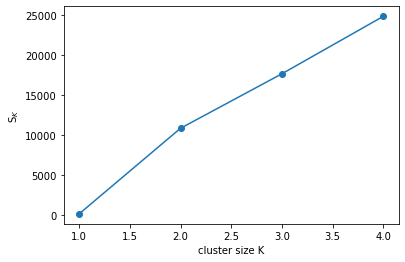

In [328]:
plt.plot(cluster,entropy)
plt.scatter(cluster,entropy)
plt.xlabel('cluster size K')
plt.ylabel('S$_{K}$')
#plt.savefig('entropy_vs_K_neq-135.png' ,dpi = 100)

In [45]:
encoder_size = [1,2,3,4]
MSE = [0.0154,0.0112,0.0095,0.0078]

Text(0, 0.5, 'MSE')

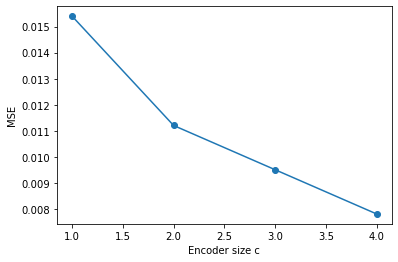

In [46]:
import matplotlib.pyplot as plt
plt.plot(encoder_size,MSE)
plt.scatter(encoder_size,MSE)
plt.xlabel('Encoder size c')
plt.ylabel('MSE')
#plt.savefig('MSE_vs_c_170.png' ,dpi = 100)